# Analysis of Travel Insurance Data

Source: https://www.kaggle.com/datasets/mhdzahier/travel-insurance

In [126]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [114]:
df=pd.read_csv('travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [116]:
df=df.drop(['Gender'], axis=1)

As gender column has many missing value and we may drop this column

In [117]:
df1 = df.groupby(by=["Destination"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['DestinationNew'] = np.where(df1['counts']>2200, df1['Destination'], 'Others')
fig = px.pie(df1, values='counts', names='DestinationNew', title='Popular destinations for the insured')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 10 most popular destinations for the insured. It groups countries to others if it has less than 2200 insurance policies

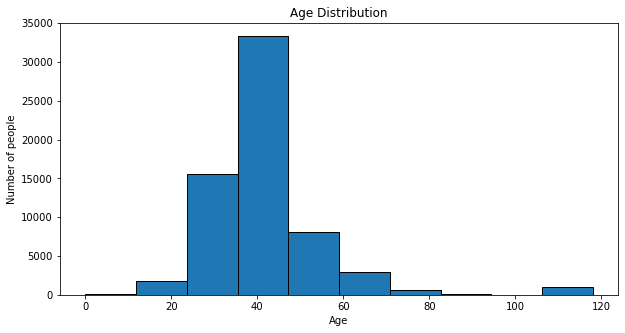

In [118]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['Age'],edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Age Distribution")
plt.show()

The majority of people opting for travel insurance are of the age 30 to 50

In [119]:
df1 = df.groupby(by=["Agency"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['AgencyNew'] = np.where(df1['counts']>2200, df1['Agency'], 'Others')
fig = px.pie(df1, values='counts', names='AgencyNew', title='Popular agency for the insured')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 5 most popular agenys for the insured. It groups agency to others if it has less than 2200 insurance policies

In [120]:
df1 = df.groupby(by=["Product Name"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['ProductNameNew'] = np.where(df1['counts']>5000, df1['Product Name'], 'Others')
fig = px.pie(df1, values='counts', names='ProductNameNew', title='Top 5 the most popluar plan')
fig.show()

There are 5 most popular plans for the insured. It groups plan to others if it has less than 5000 insurance policies

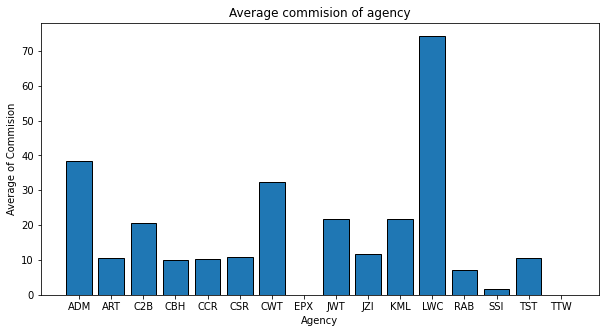

In [121]:
df1=df.groupby(by=['Agency']).mean().reset_index()
fig = plt.figure(figsize = (10, 5))
plt.bar(df1['Agency'], df1['Commision (in value)'],edgecolor='black')
plt.xlabel("Agency")
plt.ylabel("Average of Commision")
plt.title("Average commision of agency")
plt.show()

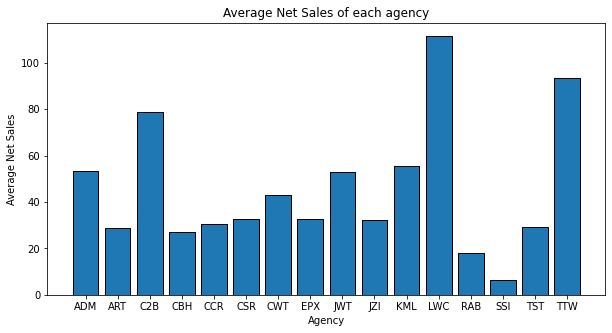

In [122]:
df_sorted_desc= df.sort_values('Net Sales',ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df1['Agency'], df1['Net Sales'],edgecolor='black')
plt.xlabel("Agency")
plt.ylabel("Average Net Sales")
plt.title("Average Net Sales of each agency")
plt.show()

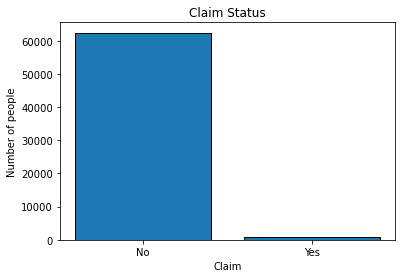

In [125]:
df1 = df.groupby(by=["Claim"]).size().reset_index(name="counts")
plt.bar(df1['Claim'], df1['counts'],edgecolor='black')
plt.xlabel("Claim")
plt.ylabel("Number of people")
plt.title("Claim Status")
plt.show()